# DIABETES PREDICTION

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

### Reviewing the dataset 

In [3]:
data_frame = pd.read_csv("diabetes.csv")

In [4]:
data_frame.shape

(768, 9)

In [5]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data_frame.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data_frame.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking for null values

In [50]:
print(data_frame.isnull().values.any())

False


### Correlated Feature Check 

In [10]:
def plot_corr(data_frame, size=11):
    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

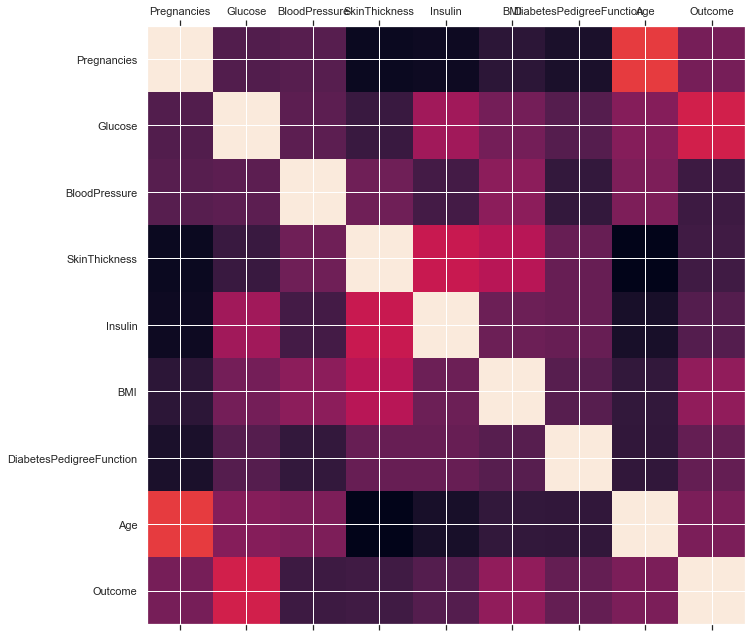

In [11]:
plot_corr(data_frame)

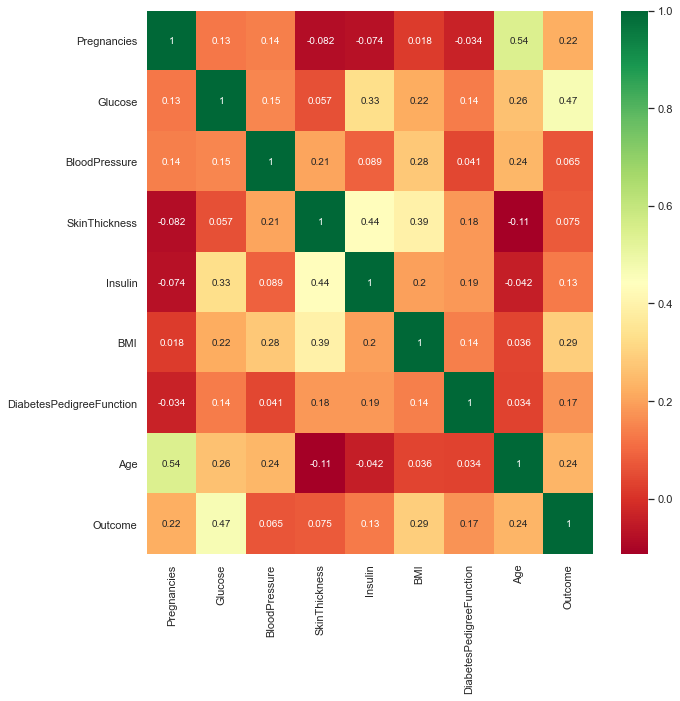

In [12]:
#heatmap of each correlation features
corrmat = data_frame.corr()
top_cor_feature = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data_frame[top_cor_feature].corr(),annot=True,cmap='RdYlGn')

In [16]:
data_frame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Data Visualization

Negative (0):  500
Positive (1):  268


C:\Users\aksha\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


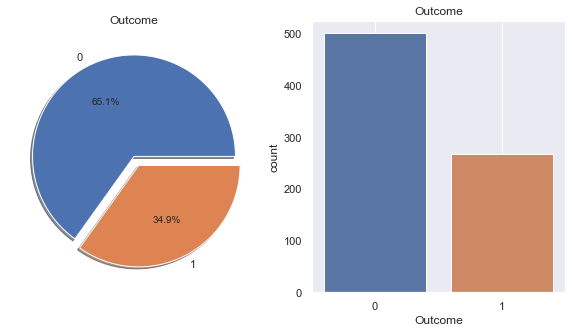

In [17]:
#plotting pie chart
f,ax=plt.subplots(1,2,figsize=(10,5))
data_frame['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data_frame,ax=ax[1])
ax[1].set_title('Outcome')

plt.grid()
plt.show()

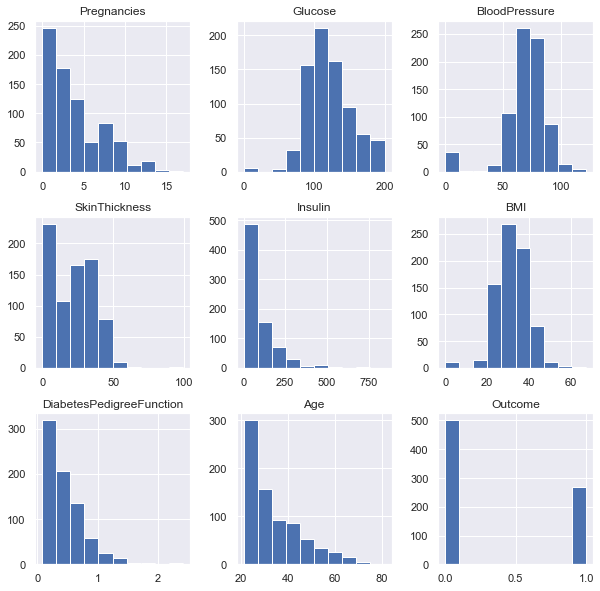

In [18]:
# Histogram for each feature
data_frame.hist(bins=10,figsize=(10,10))
plt.show()

### Data Type

In [14]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking for null values again

In [19]:
data_frame.isnull().values.any()

False

### Checking class distribution

In [16]:
#count of positive and negative
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Outcome'] == 1])
num_false = len(data_frame.loc[data_frame['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


### Spliting Data 

In [20]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = data_frame[feature_col_names].values
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%

In [18]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


#### Verifying the split

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Outcome'] == 1]), (len(data_frame.loc[data_frame['Outcome'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Outcome'] == 0]), (len(data_frame.loc[data_frame['Outcome'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split data Preparation

In [20]:
# Hidden missing values
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['Glucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['BloodPressure'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['SkinThickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['Insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['BMI'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['DiabetesPedigreeFunction'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['Age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with mean

In [23]:
from sklearn.impute import SimpleImputer

#Impute with mean for all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training Initial Algorithm - NAIVE BAYES

In [24]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Performance on Training Data

In [25]:
#returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

In [26]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7542


## Performance on Testing Data

In [49]:
#returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)
print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is: 0.7359


In [28]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 52  28]
 [ 33 118]]


In [30]:
print ("Classification Report")
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

## Predict Training Data 

In [32]:
rf_predict_train = rf_model.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


## Predict Testing Data 

In [33]:
rf_predict_test = rf_model.predict(X_test)
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7403


In [34]:
import plot as plot

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 52  28]
 [ 32 119]]

Classification Report

              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



#   



# LOGISTIC REGRESSION 

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print ("Confusion Matrix")
print (metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy : 0.7489
Confusion Matrix
[[ 48  32]
 [ 26 125]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



C:\Users\aksha\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


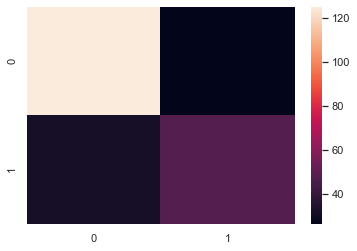

In [48]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_predict_test))

In [51]:
'''
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  
# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print( "Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])) 
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))
'''

'\nfrom sklearn.linear_model import LogisticRegressionCV\n\nlr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  \n# set number of jobs to -1 which uses all cores to parallelize\nlr_cv_model.fit(X_train, y_train.ravel())\n\nlr_cv_predict_test = lr_cv_model.predict(X_test)\n\n# training metrics\nprint( "Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))\nprint (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])) \nprint ("")\nprint ("Classification Report")\nprint (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))\n'

# SUPPORT VECTOR MACHINE

In [37]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train.ravel())

SVC(C=1, kernel='linear', random_state=42)

In [38]:
#returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [39]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.7840


In [40]:
svm_predict_test = svm_model.predict(X_test)
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.7359


In [52]:
import plot as plot

print ("Confusion Matrix for Support Vector Machine")
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Machine
[[ 46  34]
 [ 27 124]]

Classification Report

              precision    recall  f1-score   support

           1       0.63      0.57      0.60        80
           0       0.78      0.82      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



# DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [43]:
prediction_from_trained_data = dt_model.predict(X_train)

In [44]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our Decision Tree model is : {0:.4f}".format(accuracy))

Accuracy of our Decision Tree model is : 1.0000


In [45]:
dt_predict_test = dt_model.predict(X_test)
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

Accuracy: 0.7143


In [46]:
import plot as plot

print ("Confusion Matrix for DT")
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[ 52  28]
 [ 38 113]]

Classification Report

              precision    recall  f1-score   support

           1       0.58      0.65      0.61        80
           0       0.80      0.75      0.77       151

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.72       231

